# The Statisical Analysis of the Diabetes Dataset - Data Science Project 2

## Introduction

(Thanks to [this article](https://medium.com/@bagusmurdyantoro1997/statistical-analysis-of-breast-cancer-wisconsin-diagnostic-2852a0558bd9) for the inspiration and guidance behind this project!)

In the realm of modern healthcare, data-driven approaches are revolutionizing our understanding of complex diseases like diabetes. With the increasing availability of large-scale datasets, statistical analysis has become a crucial tool for uncovering valuable insights and patterns hidden within the data. In this project, I will delve into the world of diabetes research, leveraging the power of various Python libraries to perform an in-depth statistical analysis of a diabetes dataset.

From data preprocessing and exploratory analysis to hypothesis testing and correlation studies, join me on this analytical journey as I demonstrate how statistical analysis can empower researchers and healthcare professionals in the ongoing battle against diabetes.







## Importing Relevant Libraries

First, we import the relevant libraries: NumPy, Pandas, scikit-learn, matplotlib, seaborn and SciPy.

Then we load the dataset.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.


In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr

In [19]:
data = pd.read_csv('diabetes.csv')

data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Now, we filter the data into two subsets involving those tested positive for diabetes (class 1) or negative (class 0).

In [20]:
positive_data = data.loc[data['Outcome'] == 1][['Outcome', 'BMI']]
negative_data = data.loc[data['Outcome'] == 0][['Outcome', 'BMI']]

Observe what is going on here:

The .loc method from Pandas allows us to access data rows and columns by labels or a Boolean array.

Firstly, we target the individual outcomes (0 and 1) by using:

`data.loc[data['Outcome'] == 1]`
and
`data.loc[data['Outcome'] == 0]`

Now, out of all the rows, we only need Outcome and BMI, for our initial analysis, hence the nested list: `[['Outcome', 'BMI']]`

## Descriptive Stats of the BMI of Positive and Negative Patients

Let's check out the descriptive statistics of BMI across the outcome types.

In [21]:
# For Outcome = 0 (negative data)
print("Descriptive Stats for the Negative Patients:")
print("Mean: {:.4f}".format(negative_data.BMI.mean()))
print("Variance: {:.4f}".format(negative_data.BMI.var()))
print("Standard Deviation: {:.4f}".format(negative_data.BMI.std()))
print("Description:")
print(negative_data.BMI.describe())

Descriptive Stats for the Negative Patients:
Mean: 30.3042
Variance: 59.1339
Standard Deviation: 7.6899
Description:
count    500.000000
mean      30.304200
std        7.689855
min        0.000000
25%       25.400000
50%       30.050000
75%       35.300000
max       57.300000
Name: BMI, dtype: float64


Observe how the data is being accessed: first the data subset, `negative_data`, then the column in the susbset that we want to examine (in this case, it is `.BMI`), and then the function we want to call (be it mean, standard deviation, or just a description of the data points).

The values are displayed, with their precision limited to 4 decimal places.

Now, let's look at the data of patients that tested positive.

In [22]:
# For Outcome = 1 (positive data)
print("Descriptive Stats for the Positive Patients:")
print("Mean: {:.4f}".format(positive_data.BMI.mean()))
print("Variance: {:.4f}".format(positive_data.BMI.var()))
print("Standard Deviation: {:.4f}".format(positive_data.BMI.std()))
print("Description:")
print(positive_data.BMI.describe())

Descriptive Stats for the Positive Patients:
Mean: 35.1425
Variance: 52.7507
Standard Deviation: 7.2630
Description:
count    268.000000
mean      35.142537
std        7.262967
min        0.000000
25%       30.800000
50%       34.250000
75%       38.775000
max       67.100000
Name: BMI, dtype: float64


## Description and Outliers in Data of Positive and Negative Patients

To achieve this, we use a countplot from Seaborn.

First, we write:

`sns.countplot(...)  # where '...' represents the parameters to be passed`

Then, for our parameters, we pass the following:
1. **`x`**: This represents the label of the x-axis, as well as the name of the column you wish to count.
2. **`data`**: This is the dataset variable. NOTE: Not the subste, the full dataset.
3. **`palette`**: This is the list of colours you want to use to denote each unique section/group of your data.
4. **`edgecolor`**: This is the colour of the edge of the bar in your plot.
5. **`alpha`**: This sets the transparency of your plot. The lower the value (from 0 to 1), the more transparent your plot will be.

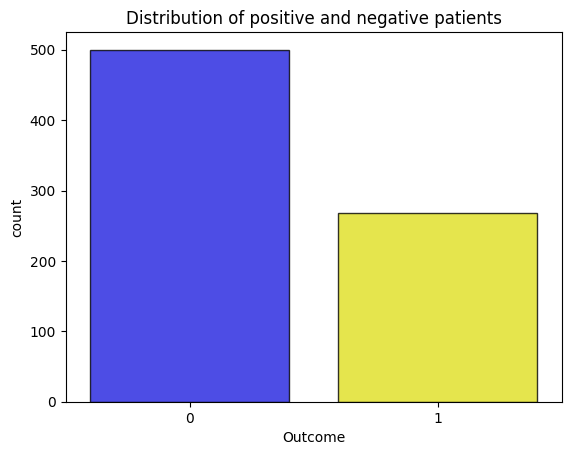

In [23]:
# Create a countplot using Seaborn to get the distribution of positive and negative patients
sns.countplot(x='Outcome', data = data, palette = ['blue', 'yellow'], edgecolor = 'black', alpha = 0.8)
plt.title("Distribution of positive and negative patients")
plt.show()

Next, let's look at the distribution of BMI values of positive and negative patients.

To do this, we first use Matplotlib.pyplot's `plt.hist()` function.
This function returns three things: the sequence of data for the histogram bins, the bins themselves, and a container (or list of containers) used to create the histogram.

You can check the [docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) for a better understanding of this function.

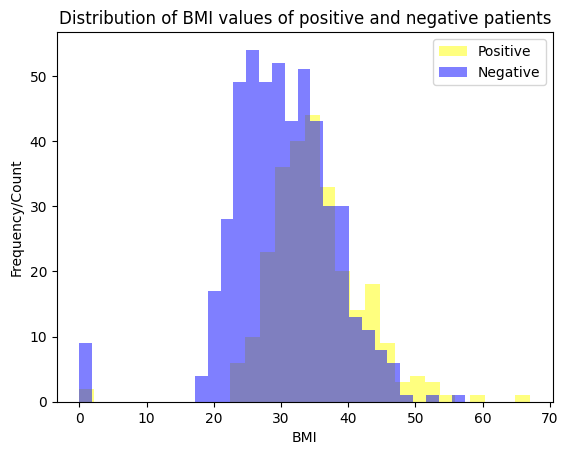

Most frequent BMI for positive patients is: 33.5500
Most frequent BMI for negative patients is: 24.8300


In [24]:
# First, create the histogram, and assign variables to the return values of the plt.hist() function
p_seq_hist, p_bins, c = plt.hist(positive_data['BMI'], bins = 30, color = 'yellow', alpha = 0.5, label = "Positive")
# alpha is that low because we need to see through both plots.
# Now, plot for the negative data.
n_seq_hist, n_bins, c = plt.hist(negative_data['BMI'], bins = 30, color = 'blue', alpha = 0.5, label = "Negative")
# Now, we add labels, legend and a title to our plot.
plt.legend() #That's all you need, really. It takes the label from the label parameter in our hist().
plt.xlabel('BMI')
plt.ylabel("Frequency/Count")
plt.title("Distribution of BMI values of positive and negative patients")
plt.show()

# ------------------<END OF CODE FOR PLOT CREATION>-----------------------------------------------
# Find the bin with the highest frequency count in the histogram and retrieve the corresponding bin value from the bin edges array.
# This bin value represents the most frequent BMI.

# Find the index of the maximum value in the p_seq_hist array using np.argmax()
# This will identify the bin with the highest frequency.
p_hist_max = np.argmax(p_seq_hist)
n_hist_max = np.argmax(n_seq_hist)
# Now, retrieve from the bins array using the indexes above:
p_freq_BMI = p_bins[p_hist_max]
n_freq_BMI = n_bins[n_hist_max]

print("Most frequent BMI for positive patients is: {:.4f}".format(p_freq_BMI))
print("Most frequent BMI for negative patients is: {:.4f}".format(n_freq_BMI))

***Observation:*** Patients who test positive for diabetes show higher BMI levels compared to those who test negative.

### A sidenote: np.max() vs np.argmax()

I feel there is the need to differentiate between the `max()` and `argmax()` functions in NumPy, so here we go!

The np.max() returns the maximum value of a NumPy array.

So, for example, an array of `[1,2,5,7,4]`, would have a maximum value of 7.

Makes sense, right?

The argmax() however, returns the index of the maximum value of the array. Remember that array indexing starts from 0, so for the array example, the index of 7 is...3.

## Finding Outliers in the BMI values

When we look at the graph, we can see that there are outliers in the BMI data for both positive and negative patients. An outlier is basically an "unusual" data point - it could be an error, or some rare event.

We need to investigate further. To do this, we can use z-scores (covered [here](https:/https://github.com/samuelbolugee/PythonDSProjects/blob/main/EDADetailedOnPandas.ipynb/)), or we can use box plots, which are basically visual representations of the five-number summary, which I covered [here.](https://github.com/samuelbolugee/PythonDSProjects/blob/main/EDA2.ipynb)


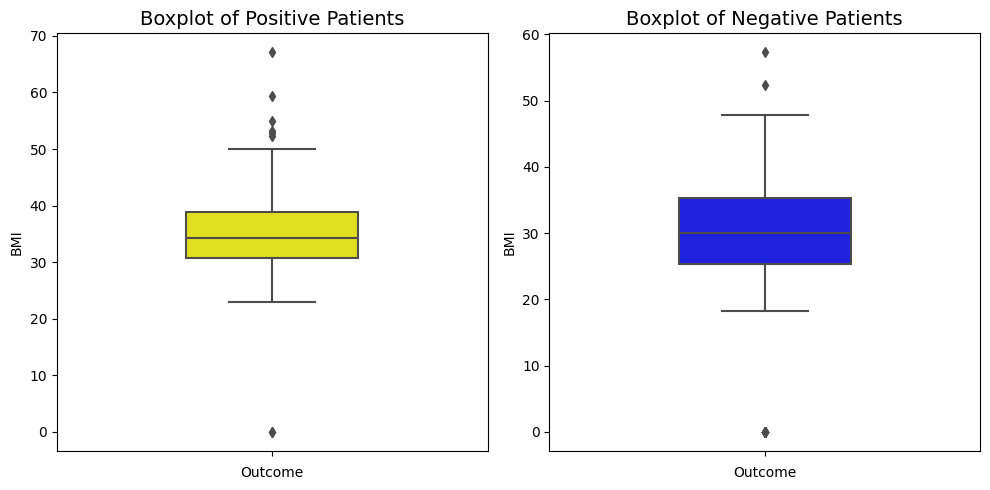

Outliers for negative data: [ 0.  53.2 55.  67.1 52.3 52.9 59.4  0. ]
Outliers for positive data: [ 0.   0.   0.   0.  52.3  0.   0.   0.   0.  57.3  0. ]


In [25]:
# Set the size of our "canvas"
plt.figure(figsize=(10,5)) # figsize is a parameter that accepts a tuple of values corresponding to the size parameters of the figure/plot

# Next, we create subplots using plt.subplot
# This allows us to create multiple plots in one figure.
plt.subplot(1,2,1) # 1 row, 2 columns, this plot is on the first column
# Call seaborn's boxplot function on the BMI values of the positive data:
sns.boxplot(y = positive_data['BMI'], color = 'yellow', width = 0.4) # NO alpha keyword here
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.title('Boxplot of Positive Patients', fontsize = 14)

plt.subplot(1,2,2) # 1 row, 2 columns, this plot is on the second column
# Call seaborn's boxplot function on the BMI values of the negative data:
sns.boxplot(y = negative_data['BMI'], color = 'blue',  width = 0.4)
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.title('Boxplot of Negative Patients', fontsize = 14)

# This will allow us to have all plots in one image/figure
plt.tight_layout()

# Display the plot
plt.show()

# ---------------------------------------<End of Boxplot Creation>------------------------------------------

# Now, we calculate to determine the outliers:
x = [positive_data, negative_data]

for i in range(0,2):
  # Set our target to vary between the two outcomes
  target = x[i]
  desc = target['BMI'].describe() # Get the descriptive stats for BMI
  # We can then access them by their index names:
  q1 = desc['25%']
  q3 = desc['75%']
  iqr = q3 - q1 # Calculate the interquartile range
  # Now, determine the lower and upper bounds
  l_bound = q1 - (1.5 * iqr)
  u_bound = q3 + (1.5 * iqr)
  # Determine the outliers by selecting data that is less than the lower bound OR higher than the upper bound in the BMI data
  outliers = target[(target.BMI < l_bound) | (target.BMI > u_bound)].BMI.values

  if i == 0:
    print("Outliers for negative data:", outliers)
  else:
    print("Outliers for positive data:", outliers)


It can be observed that the outliers for negative data are either 0 or some number above 52.3. For positive data, the BMI outliers are also either 0 or some number above 52.3. These values deviate significantly from the range of values for BMIs of both positive and negative patients.

## Using Cumulative Distribution Functions (CDFs) to determine Probablities of Observing Certain Outcomes

Imagine you have a bag of marbles, and each marble has a number written on it, representing a random value. These values could be anything, like the scores of students in a class, the heights of people in a room, or the weights of apples in a basket.

Now, you want to understand how these values are spread out. That's where the CDF comes in. It's like a map that shows you the probabilities of getting a value less than or equal to a certain number.

A cumulative distribution function (CDF) is a fundamental concept in statistics that helps us understand and analyze the probability distribution of a random variable.

Let's break it down step by step:

1. **Random Variables:**

In statistics, we often deal with random variables. These are variables whose values are subject to chance or uncertainty. For example, when rolling a fair six-sided die, the outcome (1, 2, 3, 4, 5, or 6) is a random variable.

2. **Probability Distribution:**

A probability distribution describes how the possible values of a random variable are distributed or spread out. It tells us the likelihood of each value occurring.

3. **Probability Mass Function (PMF) or Probability Density Function (PDF):**

For discrete and continuous random variables, respectively, we often use probability mass functions (PMFs) or probability density functions (PDFs) to describe the probability distribution. These functions assign probabilities or densities to specific values or ranges of values.

4. **Cumulative Distribution Function (CDF):**

The CDF takes the concept a step further. It provides a way to find the cumulative probability associated with a random variable taking on a value less than or equal to a specific value.

*Mathematically, for a random variable X:*

If X is discrete, the CDF is defined as:

cumulative_distribution_function.svg
>*where F(x) represents the cumulative probability that X is less than or equal to x.*

If X is continuous, the CDF is defined as:

> *F(x) = ∫[−∞, x] f(t) dt, where f(t) is the probability density function.*

The CDF ranges from 0 to 1, with F(-∞) = 0 and F(∞) = 1.

You can find probabilities associated with specific intervals by subtracting CDF values.

> ***For example, P(a < X ≤ b) = F(b) - F(a).***



Let us use this to find the probability that the BMI of a positive patient is less than 35, and that the BMI of negative patents is less than 27.


Desired probability for class 0 is: 0.6659999999999999
Desired probability for class 1 is: 0.4253731343283582


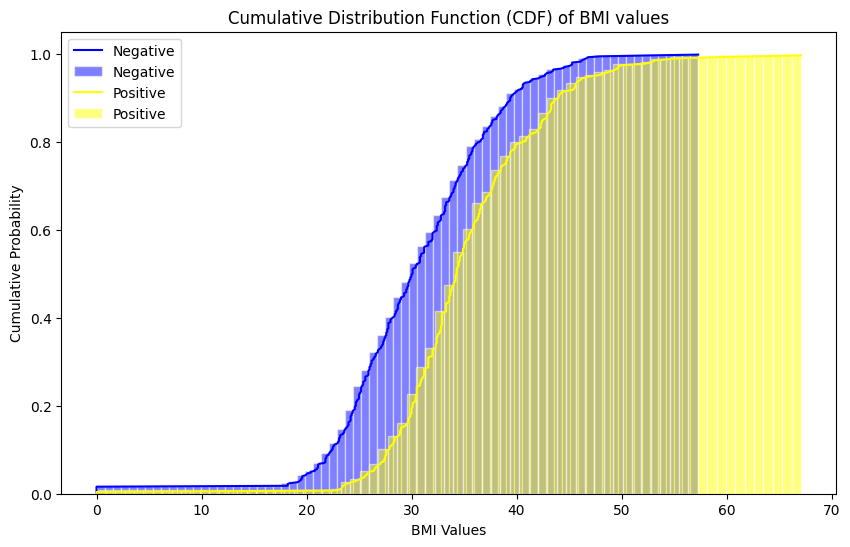

In [26]:
classes_info = {"negative_data":27, "positive_data":35}
labels_info = {"Negative":'blue', "Positive":'yellow'}

# Set the size of the figure
plt.figure(figsize=(10, 6))

for i in range(0,2):
  name = list(classes_info.keys())[i]
  target = locals()[name]
  label_target = list(labels_info.keys())[i]
  # Compute and sort the CDF values for each class.
  sorted = np.sort(target.BMI)
  y = np.arange(len(sorted)) / float(len(target - 1)) # a range from 0 to a maximum of 1.0
  # Calculate cumulative probabilities for each class:
  c_probs = np.arange(1, len(sorted) + 1) / len(sorted)
  index = np.argmax(sorted > classes_info[name])
  prob = 1 - c_probs[index]

  # Plot the CDF
  plt.plot(sorted, y, color = labels_info[label_target], label = label_target)

  # Plot the histograms:
  plt.hist(target.BMI, color = labels_info[label_target], bins = 75, alpha = 0.5, label = label_target, density=True, cumulative=True, edgecolor='white')

  # Print desired probabilities:
  print("Desired probability for class {} is:".format(i), prob)

# Set the title and labels
plt.title('Cumulative Distribution Function (CDF) of BMI values')
plt.xlabel('BMI Values')
plt.ylabel('Cumulative Probability')

# Display the legend
plt.legend()

plt.show()

###***So, that's a lot of code, right?***

Let's break it down.

There are a few things of interest:

1. I kept all information regarding the classes and desired values for calculating probabilities inside one dictionary. Dictionaries are a great way to keep your sets of values ordered, whch is what I was aiming for.
To access the keys of your dictionary (say `dict`), then use the `dict.keys()` method.

But  `dict.keys()` returns a key object which contains a list of keys. How then do we get the keys in a list for easier access?

Simple. We use `list()` to achieve this. In this case, our indexes `i` are being generated by a `range()` function.

2. There is one problem, however: the keys are **strings**! This may come in handy most of the time, but if you noticed, in the `plt.hist()` plot, we can't pass a string as the name of our DataFrame holder! So, we must convert it to a variable name. I did this using the `locals()` method. Ideally, `locals()` returns a dictionary with all the loacl variables and symbols for the current program.

When we use the `locals()[name]` in the code above, what we are trying to do is to take the string which is stored the the variable `name`, and use the `locals()` method to "get" it as a variable.

3. Next, we sorted the BMI values.
4. To obtain the range of values from 0 to a maximum of 1.0, we use the `np.arange()` function.

`np.arange(len(sorted))`: This part of the code creates a NumPy array that contains a sequence of numbers from 0 to one **less than** the length of the sorted array. Here, `len(sorted)` returns the number of elements in the sorted array, and `np.arange(`) generates a sequence of integers starting from 0 and ending at one less than the specified length.

`float(len(target - 1))`: This part calculates the length of the target array minus 1 and converts it to a floating-point number.

5. Consider this piece of code:
```
c_probs = np.arange(1, len(sorted) + 1) / len(sorted)
index = np.argmax(sorted > classes_info[name])
prob = 1 - c_probs[index]
```
This is the part of the code used to calculate the cumulative probabilities. Let's see what it does:

**a.** `c_probs = np.arange(1, len(sorted) + 1) / len(sorted)`

`np.arange(1, len(sorted) + 1)` generates an array of integers starting from 1 up to the length of the `sorted` array. This array represents the indices or positions of elements in the `sorted` array.

`/ len(sorted)` divides each element of the generated array by the length of the `sorted` array. This operation normalizes the values in the array to be in the range `[0, 1]`, effectively converting the indices into probabilities.

So, `c_probs` is an array of probabilities, where each element represents the probability of an element in `sorted` being selected.

**b.** `index = np.argmax(sorted > classes_info[name])`

`sorted > classes_info[name]` creates a boolean array where each element is `True` if the corresponding element in `sorted` is greater than the value stored in `classes_info[name]`, and `False` otherwise.

`np.argmax()` finds the index of the first occurrence of `True` in the boolean array. This effectively identifies the first element in `sorted` that is **greater than** `classes_info[name]`.

So, `index` will hold the index of the first element in `sorted` that is greater than `classes_info[name]`. However, since we need the probability that such a value is less than what was intended, we subtract from 1.

## Cohen's Effect Size - A Gauge of "Practical" Significance

Cohen's effect size, named afted the statistician Jacob Cohen (1923 - 1998), helps answer the question, "Is the observed effect large enough to be meaningful in the real world?"

But hold up - what **exactly** is an "*effect size*"?

An effect size is a quantitative measure used in statistics to describe the size or magnitude of a phenomenon, or how strong the relationship between two variables is.

Cohen's effect size is **standardized**, meaning that it is expressed in a common metric that allows for comparisons across different studies, experiments, or data sets. This standardization makes it easier to assess the practical importance of findings.

Examples of unstandardized measures are the *difference between group means* and *regression coefficients*.

In this instance, I attempt to use Cohen's size to evalaute the practical significance of observable differences in BMI values of positive and negative patients.

In [27]:
# Step 1: Calculate difference between means of groups:
av_diff = positive_data.BMI.mean() - negative_data.BMI.mean()

# Step 2: Calculate variances for each group:
var_positive = positive_data.BMI.var()
var_negative = negative_data.BMI.var()

# Step 3: Calculate the pooled variance
pooled_var = (len(positive_data) * var_positive) + (len(negative_data) * var_negative) / float(len(positive_data) + (len(negative_data)))

# Step 4: Divide the mean difference with the square root of the pooled variance to obtain the Cohen's effect size:
effect_size = av_diff / np.sqrt(pooled_var)

# Step 5: Print the effect size
print("Effect size:", effect_size)

Effect size: 0.040637232631926194


A Cohen's ***d*** of 0.04 indicates that the difference between the means of the two groups is very small, and likely not **practically significant.**
It suggests that while there is minimal overlap between the two groups, the difference is not substantial enough to have practical implications.

## Exploring the Nature and Strength of Relationships - Correlation and Covariance

This involves assessing the degree and nature of associations between pairs of variables within a dataset. Two essential statistical concepts for exploring these relationships are ***correlation and covariance.***

Correlation measures the linear relationship between two variables, indicating whether they move together or in opposite directions. It is expressed as a coefficient, typically the Pearson correlation coefficient, which ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no linear correlation.

Covariance, on the other hand, measures the degree to which two variables change together. A positive covariance suggests that the variables tend to increase or decrease simultaneously, while a negative covariance implies an inverse relationship.

What I plan on doing here is to use jointplots from Seaborn to examine the relationship between two sets of features - Age and BP in one, and Glucose and Insulin in the other.

<Figure size 1200x600 with 0 Axes>

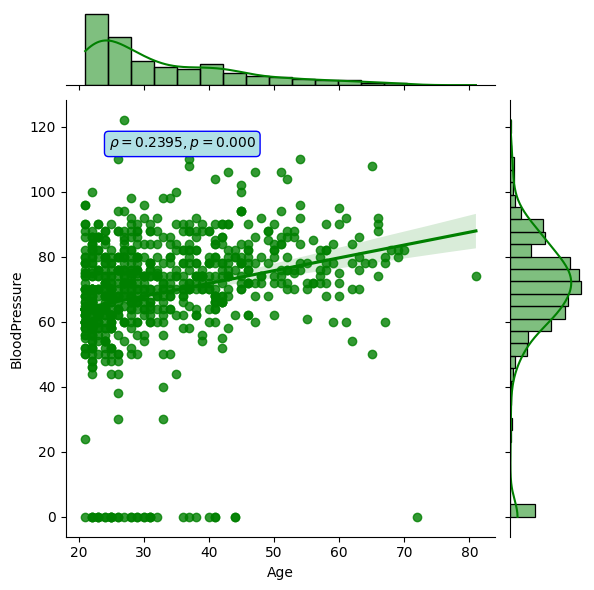

In [28]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# First plot: Age and BP
jp = sns.jointplot(data=data, x='Age', y='BloodPressure', kind = "reg", color = 'g')
# Calculate Pearson's correlation coefficient and p-value:
corr, p = stats.pearsonr(data['Age'], data['BloodPressure'])
# Annotate the plot with correlation coefficient and p-value
jp.ax_joint.annotate(f'$\\rho = {corr:.4f}, p = {p:.3f}$',
                     xy=(0.1, 0.9), xycoords='axes fraction',
                     ha='left', va='center',
                     bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'blue'})
plt.show()


So, what have we done so far?

Let's examine! Here's a step-by-step explanation:

1. **Set Figure Size:**
   - `plt.figure(figsize=(12, 6))` sets the size of the figure where the plot will be displayed. In this case, it's set to 12 inches in width and 6 inches in height.

2. **Create a Joint Plot:**
   - `sns.jointplot(data=data, x='Age', y='BloodPressure', kind="reg", color='g')` creates a joint plot using Seaborn. It displays a scatter plot of 'Age' (on the x-axis) against 'BloodPressure' (on the y-axis) with regression lines ('kind="reg"') and sets the color to green ('color='g'').

3. **Calculate Pearson's Correlation Coefficient and P-Value:**
   - `corr, p = stats.pearsonr(data['Age'], data['BloodPressure'])` calculates Pearson's correlation coefficient (corr) and its associated p-value (p) for the 'Age' and 'BloodPressure' variables using the `pearsonr` function from the 'stats' module in SciPy. The correlation coefficient measures the linear relationship between the two variables, and the p-value assesses the significance of this relationship.

4. **Annotation:**
   - `jp.ax_joint.annotate(...)` adds an annotation to the joint plot. It displays the calculated correlation coefficient (ρ) and p-value (p) on the plot at the specified location (xy=(0.1, 0.9), which corresponds to the top-left corner of the plot, in axes fraction coordinates).
   - The annotation is formatted using **LaTeX-style notation** (e.g., `$\\rho = {corr:.4f}, p = {p:.3f}$`), which allows for mathematical symbols and formatting. This is made possible, thanks to - yup, you got it: **f-strings**!
   - It uses a rounded rectangle ('boxstyle': 'round') with a light blue fill color ('fc': 'powderblue') and a blue edge color ('ec': 'blue') to highlight the annotation.

   The rest is fairly self-explanatory!

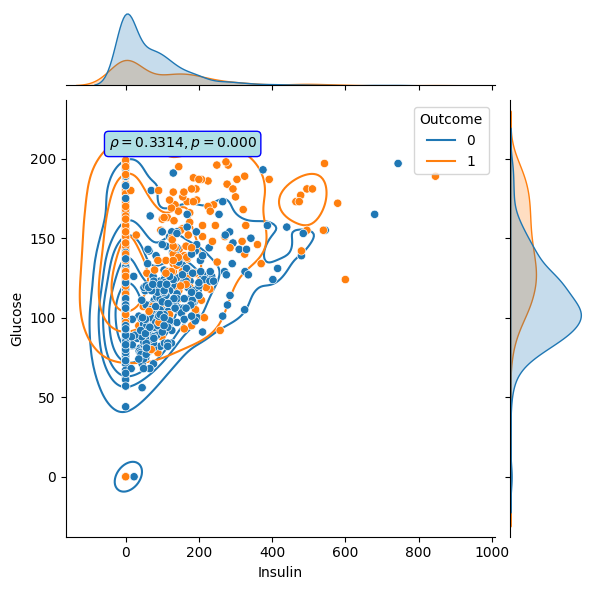

In [29]:
# Second plot: Insulin and Glucose levels
jp_2 = sns.jointplot(data=data, x='Insulin', y='Glucose', hue = 'Outcome')
jp_2.plot_joint(sns.kdeplot, zorder=0, levels=6)
# Calculate Pearson's correlation coefficient and p-value:
corr_2, p_2 = stats.pearsonr(data['Insulin'], data['Glucose'])
# Annotate the plot with correlation coefficient and p-value
jp_2.ax_joint.annotate(f'$\\rho = {corr_2:.4f}, p = {p_2:.3f}$',
                       xy=(0.1, 0.9), xycoords='axes fraction',
                       ha='left', va='center',
                       bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'blue'})


# Display the plot
plt.show()



Notice anything different?

> ***That's because it already is.***

But what changed?

Let's examine!

```
jp_2 = sns.jointplot(data=data, x='Insulin', y='Glucose', hue='Outcome')
```

1. `jp_2` is being assigned the result of the `sns.jointplot` function. This function is used to create a scatter plot with histograms along the x and y axes. In this case, the following parameters are used:
   - `data`: This specifies the dataset (`data`) from which the 'Insulin' and 'Glucose' columns will be used for plotting.
   - `x='Insulin'`: This specifies that the 'Insulin' column will be used for the x-axis.
   - `y='Glucose'`: This specifies that the 'Glucose' column will be used for the y-axis.
   - `hue='Outcome'`: The 'Outcome' column is used to color-code the points in the scatter plot based on the values in the 'Outcome' variable.

Let's move on to the next line of code:

```
jp_2.plot_joint(sns.kdeplot, zorder=0, levels=6)
```

2. `jp_2.plot_joint(sns.kdeplot, zorder=0, levels=6)`: This line of code is customizing the joint plot created earlier. Here's what each part does:

   - `jp_2.plot_joint(...)`: This part modifies the central scatter plot. Instead of plotting points, it will now overlay a kernel density estimate (KDE) plot. A KDE plot is a smoothed representation of the data's distribution.
   - `sns.kdeplot`: The `sns.kdeplot` function is used to create the KDE plot.
   - `zorder=0`: The `zorder` parameter specifies the layering order of the plot elements. A `zorder` of 0 means that the KDE plot will be drawn behind the scatter points, ensuring that the points are visible on top of the KDE estimate.
   - `levels=6`: The `levels` parameter sets the number of contour levels in the KDE plot. In this case, it is set to 6, which means that the KDE plot will have 6 contour lines representing different levels of density.

For more information, visit [here](https://seaborn.pydata.org/generated/seaborn.JointGrid.plot_joint.html) for the `plot_joint` method under `Seaborn.JointGrid` or [here](https://seaborn.pydata.org/generated/seaborn.jointplot.html) for information on the `jointplot` method.

So, enough on pretty plots.

What do the results tell us?

1. Both pairs of features are weakly correlated.
2. Most negative patients have a glucose level between 100-150. For positive patients, most glucose levels fall between 120-200.
3. The most common insulin level is 0.

## Statistical Significance with Hypothesis Testing, ANOVA and Tukey's Test

Imagine you have collected data on various aspects of a scientific experiment, a marketing campaign, or even a medical study. You've generated intriguing patterns and differences among groups or treatments, but you need to answer a crucial question: Are these differences ***statistically significant***, or could they have occurred by random chance alone?

But wait, what is statistical significance?

Statistical significance is a fundamental concept in data analysis and hypothesis testing. It allows us to determine whether observed differences or relationships in data are likely to be real or if they could have occurred by random chance.

We can determine statistical significance with ***hypothesis testing.***

Look at it this way - you've asked the questions, and from your questions, you made observations. You spotted some insights/anomalies.

What happens next?

You start getting ideas! You're exposed to the "small picture", and you want to understand the "big picture", so you start making guesses based on your ideas to try and answer the questions you want to answer.

That's where a hypothesis comes in.

Remember the **scientific method** from chemistry?

A hypothesis is basically **"an intelligent guess"**.

But in the world of data, guesses are not enough, which is why we need to rigorously test and validate them, and reject the ones that do not work!
  
Hypothesis testing is a systematic approach to making inferences about a population based on a sample of data. It involves defining a null hypothesis (H0) and an alternative hypothesis (H1). The null hypothesis typically represents a default or no-effect assumption, while the alternative hypothesis suggests the presence of an effect or difference. By comparing sample statistics to expected values under the null hypothesis, we can assess whether there is enough evidence to reject the null hypothesis in favor of the alternative.

Furthermore, we'll embark on a journey into the world of ANOVA, a powerful statistical technique that assesses whether the means of multiple groups are significantly different. ANOVA helps us tackle questions involving more than two groups, such as comparing the effectiveness of multiple drug treatments or analyzing the impact of various marketing strategies. To unravel the nuances of ANOVA, we'll also introduce Tukey's Test, a post-hoc analysis that uncovers which specific groups differ significantly from one another.

***So, without further ado...***

### Covariance

In [30]:
cov_age_bmi = np.cov(data.Age, data.BMI)[0,1]
cov_bp_glucose = np.cov(data.BloodPressure, data.Glucose)[0,1]
cov_dpf_insulin = np.cov(data.DiabetesPedigreeFunction, data.Insulin)[0,1]

print("Covariance between Age and BMI:", cov_age_bmi)
print("Covariance between BP and Glucose:", cov_bp_glucose)
print("Covariance between DPF and Insulin:", cov_dpf_insulin)

Covariance between Age and BMI: 3.3603299176988295
Covariance between BP and Glucose: 94.43095563070403
Covariance between DPF and Insulin: 7.066680509153629


Positive covariance indicates that when one variable increases, the other tends to increase as well, while negative covariance suggests that when one variable increases, the other tends to decrease. A covariance of zero means there is no linear relationship between the variables.

Let's interpret the results:

1. **Covariance between Age and BMI (3.360):** This positive covariance suggests that there is a tendency for age and BMI to increase together on average. In other words, as individuals get older, they tend to have slightly higher BMI values on average.

2. **Covariance between BP (Blood Pressure) and Glucose (94.431):** This relatively high positive covariance indicates that there is a positive association between blood pressure and glucose levels. On average, as blood pressure increases, glucose levels also tend to increase. This relationship can have very important implications in healthcare, as elevated blood pressure and glucose levels are risk factors for various medical conditions.

3. **Covariance between DPF (Diabetes Pedigree Function) and Insulin (7.067):** This positive covariance suggests that there is a tendency for diabetes pedigree function and insulin levels to increase together on average. It implies that individuals with higher diabetes pedigree function values also tend to have higher insulin levels.

### Analysis of Variance (ANOVA)
ANOVA test is used to compare the means of more than 2 groups (as against a t-test or Z-test, which can be used to compare 2 groups).

***ANOVA Hypotheses:***

I'll expand further on the null and alternative hypotheses in the context of a one-way analysis of variance (ANOVA) test:

**Null Hypothesis (H0):**
The null hypothesis in a one-way ANOVA test states that there is no significant variation in the means of the groups being compared. In mathematical notation, it is often expressed as:

H0: μ1 = μ2 = μ3 = ... = μp
- μ1, μ2, μ3, ..., μp represent the population means of each of the p groups you are comparing.
- The null hypothesis essentially states that all of these population means are equal, indicating that there are no meaningful differences between the groups.

**Alternative Hypothesis (H1):**
The alternative hypothesis in a one-way ANOVA test is the opposite of the null hypothesis. It suggests that there is at least one group mean that is different from the means of the other groups. Mathematically, it is expressed as:

H1: At least one μ is not equal to the others

- This implies the existence of variability in the population means, and at least one group stands out as having a different mean compared to the rest.
- It does not specify which group(s) have different means or the direction of the differences; it only asserts that there are differences.

In practical terms:
- Researchers use the one-way ANOVA test to determine if there are statistically significant differences in means among multiple groups.
- If the p-value from the ANOVA test is less than a chosen significance level (e.g., 0.05), it provides evidence against the null hypothesis, suggesting that at least one group differs significantly from the others.
- If the p-value is greater than the significance level, there is insufficient evidence to reject the null hypothesis, indicating that the group means are not significantly different.

This is a very nice [article](https://www.reneshbedre.com/blog/anova.html) on the subject of ANOVA and Tukey's tests. It'll be worth your time.

I will be carrying out a two-way ANOVA test with some factors on the dependent variable (Outcome).

In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Outcome ~ BMI + Glucose + BMI:Age', data = data).fit()

anova_table = sm.stats.anova_lm(model, typ =2)
print(anova_table)

              sum_sq     df           F        PR(>F)
BMI         6.590809    1.0   39.737390  4.908710e-10
Glucose    23.501432    1.0  141.695146  4.311052e-30
BMI:Age     3.188190    1.0   19.222280  1.326474e-05
Residual  126.716367  764.0         NaN           NaN


The p-value obtained from ANOVA analysis for BMI, Glucose, and BMI + Age are statistically significant (p<0.05). That means, they all significantly affect the outcome.

#### Why a two-way ANOVA?

A two-way analysis of variance (ANOVA), often referred to as a two-way ANOVA, is a statistical technique used to analyze the influence of two categorical independent variables (factors) on a continuous dependent variable. It allows you to explore how these two factors interact and affect the outcome variable. Two-way ANOVA is valuable in various research and experimental settings for several reasons:

1. In many real-world situations, the outcome variable may be influenced by multiple factors simultaneously.

2. Two-way ANOVA allows you to assess whether there is an interaction effect between the two factors. An interaction effect occurs when the impact of one factor on the dependent variable depends on the levels or categories of the other factor.

3. Instead of conducting separate one-way ANOVA tests for each factor, which can lead to inflated Type I error rates (false positives), a two-way ANOVA considers both factors simultaneously while properly controlling for multiple comparisons.

4.  If you have two categorical variables (e.g., gender and treatment type) and you want to compare multiple groups formed by the combinations of these variables (e.g., male vs. female within each treatment group), two-way ANOVA is the way to go.

### Tukey's Test

Remember when I said that ANOVA "does not specify which group(s) have different means or the direction of the differences; it only asserts that there are differences"?

Well, then how do we find out more about those differences?

We can use Tukey's test for that.

To perform Tukey's test, I will be using the `bioinfokit` package. To install it, use this command: `pip install bioinfokit`.


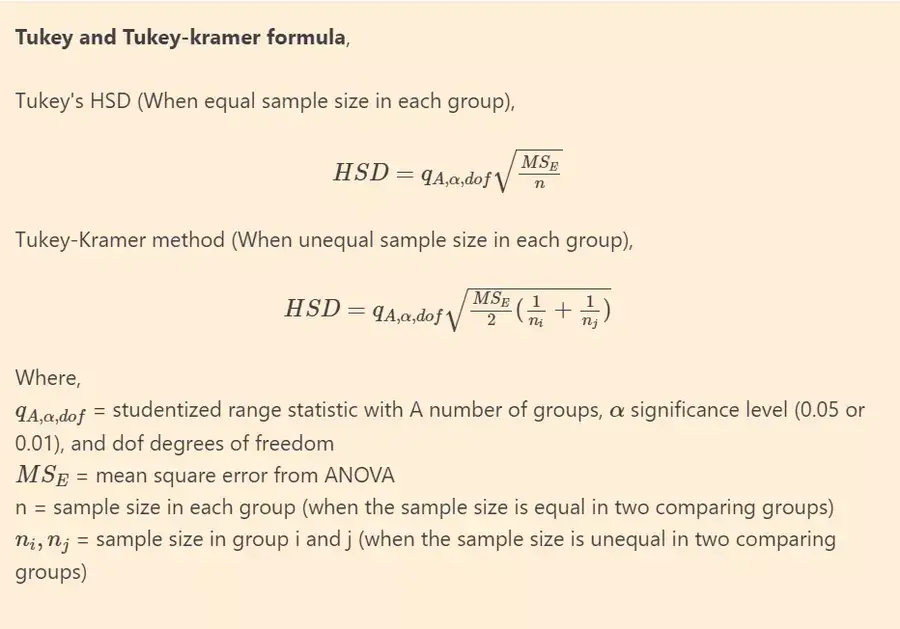

> Image source: https://www.reneshbedre.com/blog/anova.html

In [32]:
!pip install bioinfokit

In [33]:
from bioinfokit.analys import stat
# Test to perform multiple pairwise comparison (Tukey HSD)
# For an unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
# The main effect under consideration is Pregnancies
res.tukey_hsd(df=data, res_var='Outcome', xfac_var= 'Pregnancies', anova_model='Outcome ~ Pregnancies + Age + Pregnancies:Age')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,6,1,0.105185,-0.158457,0.368827,1.958124,0.900000
1,6,8,0.258947,-0.083777,0.601672,3.708229,0.416718
2,6,0,0.022342,-0.248894,0.293578,0.404280,0.900000
3,6,5,0.048421,-0.260147,0.356989,0.770166,0.900000
4,6,3,0.040000,-0.250750,0.330750,0.675212,0.900000
...,...,...,...,...,...,...,...
131,15,12,0.555556,-1.123093,2.234204,1.624308,0.900000
132,15,14,0.000000,-1.950413,1.950413,0.000000,0.900000
133,17,12,0.555556,-1.123093,2.234204,1.624308,0.900000
134,17,14,0.000000,-1.950413,1.950413,0.000000,0.900000


In [35]:
# Let's get the pairings of pregnancies that are statistically significant.
res.tukey_summary[res.tukey_summary['p-value'] < 0.05]

,group1,group2,Diff,Lower,Upper,q-value,p-value
16,1,8,0.364133,0.071687,0.656578,6.111034,0.002101
23,1,7,0.340741,0.066619,0.614863,6.100712,0.002170
24,1,9,0.428042,0.097346,0.758738,6.352700,0.001005
35,8,2,0.394481,0.092222,0.696741,6.405409,0.001000
92,2,7,0.371090,0.086521,0.655658,6.400181,0.001000
93,2,9,0.458391,0.118986,0.797797,6.628538,0.001000


**A note of warning**: If you see a p-value of 0.001 from the output of your Tukey's test (at least when usng this package), it should be interpreted as p-value <=0.001.

Observe that of the 136 pairings of different pregnancy occurences, only 6 are statistically significant.